In [8]:
import numpy as np
import matplotlib.pyplot as plt

data=np.load("/its/home/drs25/Documents/GitHub/Chaos-Robotics/Bio-inspired sensors/Stretch/stretch_data.npy")
print(data.shape)

(30, 2, 80)


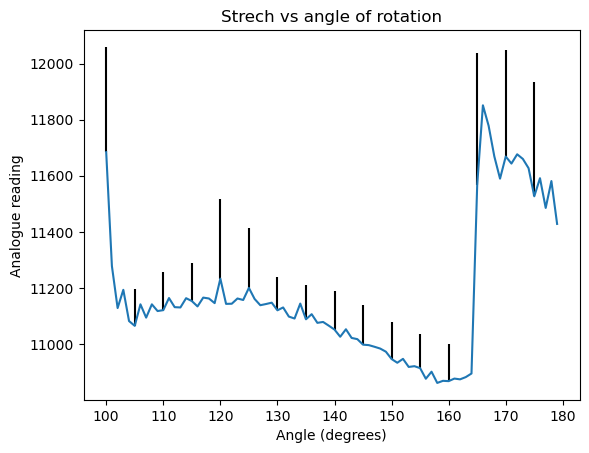

In [5]:
averaged=np.average(data,axis=0)
stds=np.std(data,axis=0)
plt.errorbar(averaged[0],averaged[1], yerr=stds,ecolor='black',errorevery=5)
plt.title("Strech vs angle of rotation")
plt.xlabel("Angle (degrees)")
plt.ylabel("Analogue reading")
plt.show()

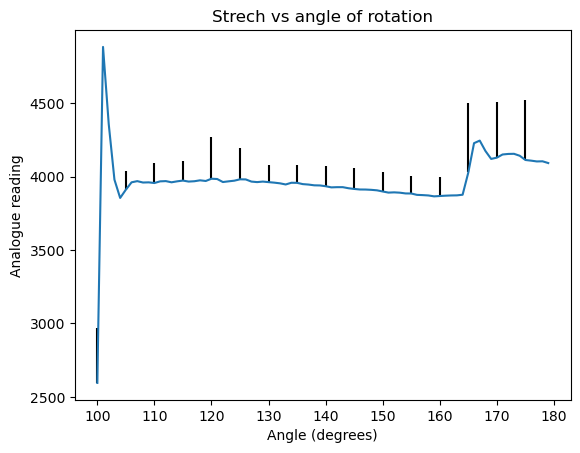

In [12]:
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=5):
    nyquist_freq = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter_filter_coefficients(order, normal_cutoff)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_filter_coefficients(order, normal_cutoff):
    b, a = [], []
    for j in range(order):
        theta = np.pi * (2 * j + 1) / (2 * order)
        sigma = -np.sin(theta) * np.sinh(np.log(2) / 2 * np.sin(np.pi / (2 * order)))
        pole_real = -sigma
        pole_imag = np.abs(np.cos(theta) * np.sinh(np.log(2) / 2 * np.sin(np.pi / (2 * order))))
        omega = 2 * np.pi * normal_cutoff
        pole = complex(pole_real, pole_imag)
        b.append(omega ** 2)
        a.append(np.real(pole) * omega)
        a.append(np.imag(pole) * omega)
    b = np.array(b)
    a = np.array(a)
    return b, a

def lfilter(b, a, data):
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        for j in range(len(b)):
            if i - j >= 0:
                filtered_data[i] += b[j] * data[i - j]
        for j in range(1, len(a)):
            if i - j >= 0:
                filtered_data[i] -= a[j] * filtered_data[i - j]
    return filtered_data

# Butterworth filter parameters
order = 2 # filter order
cutoff_freq = 3  # cutoff frequency in Hz
sample_rate = len(averaged[1])  # sample rate

# Apply the filter to the data
filtered_data = butter_lowpass_filter(averaged[1], cutoff_freq, sample_rate, order)
stds=np.std(data,axis=0)
plt.errorbar(averaged[0],filtered_data, yerr=stds,ecolor='black',errorevery=5)
plt.title("Strech vs angle of rotation")
plt.xlabel("Angle (degrees)")
plt.ylabel("Analogue reading")
plt.show()